In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#Data preprocessing for half Second Window

In [2]:
df = pd.read_csv('dataset_balanced.csv')
df

,time,activityrecognition#0,activityrecognition#1,android.sensor.light#mean,android.sensor.light#min,android.sensor.light#max,android.sensor.light#std,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,...,android.sensor.proximity#mean,android.sensor.proximity#min,android.sensor.proximity#max,android.sensor.proximity#std,android.sensor.pressure#mean,android.sensor.pressure#min,android.sensor.pressure#max,android.sensor.pressure#std,target,user
0,1,NaN,NaN,7.0,7.0,7.0,NaN,9.673811,9.461881,10.045604,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U1
1,2,NaN,NaN,7.0,7.0,7.0,NaN,9.641004,5.644632,13.734230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U1
2,3,NaN,NaN,7.0,7.0,7.0,NaN,9.683349,9.587583,9.787558,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U1
3,4,NaN,NaN,7.0,7.0,7.0,NaN,9.683914,9.576666,9.748835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U1
4,5,NaN,NaN,7.0,7.0,7.0,NaN,9.651339,8.123766,10.746942,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,24,NaN,NaN,2.0,2.0,2.0,NaN,13.521514,4.013592,26.524464,...,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,Walking,U9
3246,20,NaN,NaN,58.0,15.0,101.0,60.811183,10.922403,6.861404,20.120990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walking,U9
3247,20,NaN,NaN,2.0,2.0,2.0,NaN,10.827435,4.344246,15.434458,...,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,Walking,U9
3248,46,NaN,NaN,58.0,15.0,101.0,60.811183,11.451001,5.781501,16.839545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walking,U9


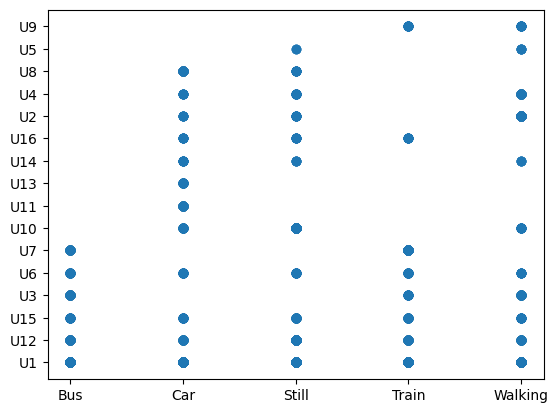

In [3]:
plt.scatter(df['target'],df['user'])

In [4]:
df['target'].value_counts()

target
Car        651
Bus        650
Still      650
Train      650
Walking    649
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250 entries, 0 to 3249
Data columns (total 69 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   time                                             3250 non-null   int64  
 1   activityrecognition#0                            1837 non-null   object 
 2   activityrecognition#1                            1837 non-null   float64
 3   android.sensor.light#mean                        2410 non-null   float64
 4   android.sensor.light#min                         2410 non-null   float64
 5   android.sensor.light#max                         2410 non-null   float64
 6   android.sensor.light#std                         1275 non-null   float64
 7   android.sensor.accelerometer#mean                3250 non-null   float64
 8   android.sensor.accelerometer#min                 3250 non-null   float64
 9   android.sensor.accelerometer#m

In [6]:
column_lst = list(df.columns)
mostly_null = []
partially_null = []
no_null = []

In [7]:
print(column_lst)

['time', 'activityrecognition#0', 'activityrecognition#1', 'android.sensor.light#mean', 'android.sensor.light#min', 'android.sensor.light#max', 'android.sensor.light#std', 'android.sensor.accelerometer#mean', 'android.sensor.accelerometer#min', 'android.sensor.accelerometer#max', 'android.sensor.accelerometer#std', 'android.sensor.magnetic_field_uncalibrated#mean', 'android.sensor.magnetic_field_uncalibrated#min', 'android.sensor.magnetic_field_uncalibrated#max', 'android.sensor.magnetic_field_uncalibrated#std', 'android.sensor.game_rotation_vector#mean', 'android.sensor.game_rotation_vector#min', 'android.sensor.game_rotation_vector#max', 'android.sensor.game_rotation_vector#std', 'android.sensor.orientation#mean', 'android.sensor.orientation#min', 'android.sensor.orientation#max', 'android.sensor.orientation#std', 'android.sensor.linear_acceleration#mean', 'android.sensor.linear_acceleration#min', 'android.sensor.linear_acceleration#max', 'android.sensor.linear_acceleration#std', 'an

In [8]:
for i in column_lst:
    percentage = (df[i].isnull().sum()*100)/5893
    if percentage >= 60:
        mostly_null.append(i)
    elif df[i].isnull().sum() > 0:
        partially_null.append(i)
    elif df[i].isnull().sum() == 0:
        no_null.append(i)

    print('Feature Name:',i)
    print("Number of missing values: ",df[i].isnull().sum(),"out of 5893")
    print("Missing percentage:"+str(percentage)+"%")
    print()

Feature Name: time
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: activityrecognition#0
Number of missing values:  1413 out of 5893
Missing percentage:23.97760054301714%

Feature Name: activityrecognition#1
Number of missing values:  1413 out of 5893
Missing percentage:23.97760054301714%

Feature Name: android.sensor.light#mean
Number of missing values:  840 out of 5893
Missing percentage:14.254199898184286%

Feature Name: android.sensor.light#min
Number of missing values:  840 out of 5893
Missing percentage:14.254199898184286%

Feature Name: android.sensor.light#max
Number of missing values:  840 out of 5893
Missing percentage:14.254199898184286%

Feature Name: android.sensor.light#std
Number of missing values:  1975 out of 5893
Missing percentage:33.51433904632615%

Feature Name: android.sensor.accelerometer#mean
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#min
Number of missing values:  

In [9]:
if len(mostly_null)+len(partially_null)+len(no_null) == len(column_lst):
    print("True")
else:
    print("False")

True


In [10]:
mostly_null

[]

In [11]:
for i in mostly_null:
    df = df.drop([i], axis = 1)

In [12]:
# df = df.drop(['id'], axis = 1)

In [13]:
df

,time,activityrecognition#0,activityrecognition#1,android.sensor.light#mean,android.sensor.light#min,android.sensor.light#max,android.sensor.light#std,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,...,android.sensor.proximity#mean,android.sensor.proximity#min,android.sensor.proximity#max,android.sensor.proximity#std,android.sensor.pressure#mean,android.sensor.pressure#min,android.sensor.pressure#max,android.sensor.pressure#std,target,user
0,1,NaN,NaN,7.0,7.0,7.0,NaN,9.673811,9.461881,10.045604,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U1
1,2,NaN,NaN,7.0,7.0,7.0,NaN,9.641004,5.644632,13.734230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U1
2,3,NaN,NaN,7.0,7.0,7.0,NaN,9.683349,9.587583,9.787558,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U1
3,4,NaN,NaN,7.0,7.0,7.0,NaN,9.683914,9.576666,9.748835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U1
4,5,NaN,NaN,7.0,7.0,7.0,NaN,9.651339,8.123766,10.746942,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,24,NaN,NaN,2.0,2.0,2.0,NaN,13.521514,4.013592,26.524464,...,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,Walking,U9
3246,20,NaN,NaN,58.0,15.0,101.0,60.811183,10.922403,6.861404,20.120990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walking,U9
3247,20,NaN,NaN,2.0,2.0,2.0,NaN,10.827435,4.344246,15.434458,...,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,Walking,U9
3248,46,NaN,NaN,58.0,15.0,101.0,60.811183,11.451001,5.781501,16.839545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walking,U9


In [14]:
partially_null

['activityrecognition#0',
 'activityrecognition#1',
 'android.sensor.light#mean',
 'android.sensor.light#min',
 'android.sensor.light#max',
 'android.sensor.light#std',
 'android.sensor.magnetic_field_uncalibrated#mean',
 'android.sensor.magnetic_field_uncalibrated#min',
 'android.sensor.magnetic_field_uncalibrated#max',
 'android.sensor.magnetic_field_uncalibrated#std',
 'android.sensor.game_rotation_vector#mean',
 'android.sensor.game_rotation_vector#min',
 'android.sensor.game_rotation_vector#max',
 'android.sensor.game_rotation_vector#std',
 'android.sensor.orientation#mean',
 'android.sensor.orientation#min',
 'android.sensor.orientation#max',
 'android.sensor.orientation#std',
 'android.sensor.linear_acceleration#mean',
 'android.sensor.linear_acceleration#min',
 'android.sensor.linear_acceleration#max',
 'android.sensor.linear_acceleration#std',
 'android.sensor.rotation_vector#mean',
 'android.sensor.rotation_vector#min',
 'android.sensor.rotation_vector#max',
 'android.sensor.

In [15]:
for i in partially_null:
    print("Partially Null Feature Name:",i)
    print("Number of unique values: ",len(df[i].unique()),"and Number of missing values: ",df[i].isnull().sum())
    print()

Partially Null Feature Name: activityrecognition#0
Number of unique values:  6 and Number of missing values:  1413

Partially Null Feature Name: activityrecognition#1
Number of unique values:  11 and Number of missing values:  1413

Partially Null Feature Name: android.sensor.light#mean
Number of unique values:  498 and Number of missing values:  840

Partially Null Feature Name: android.sensor.light#min
Number of unique values:  308 and Number of missing values:  840

Partially Null Feature Name: android.sensor.light#max
Number of unique values:  335 and Number of missing values:  840

Partially Null Feature Name: android.sensor.light#std
Number of unique values:  310 and Number of missing values:  1975

Partially Null Feature Name: android.sensor.magnetic_field_uncalibrated#mean
Number of unique values:  2741 and Number of missing values:  448

Partially Null Feature Name: android.sensor.magnetic_field_uncalibrated#min
Number of unique values:  2733 and Number of missing values:  448

In [16]:
for i in partially_null:
    df[i] = df[i].fillna(0)

In [17]:
newcolumns = list(df.columns)

In [18]:
for i in newcolumns:
    
    print('Feature Name:',i)
    print("Number of missing values: ",df[i].isnull().sum(),"out of 5893")
    print("Missing percentage:"+str(percentage)+"%")
    print()

Feature Name: time
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: activityrecognition#0
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: activityrecognition#1
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.light#mean
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.light#min
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.light#max
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.light#std
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#mean
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#min
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#max
Number of missin

In [19]:
df

,time,activityrecognition#0,activityrecognition#1,android.sensor.light#mean,android.sensor.light#min,android.sensor.light#max,android.sensor.light#std,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,...,android.sensor.proximity#mean,android.sensor.proximity#min,android.sensor.proximity#max,android.sensor.proximity#std,android.sensor.pressure#mean,android.sensor.pressure#min,android.sensor.pressure#max,android.sensor.pressure#std,target,user
0,1,0,0.0,7.0,7.0,7.0,0.000000,9.673811,9.461881,10.045604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bus,U1
1,2,0,0.0,7.0,7.0,7.0,0.000000,9.641004,5.644632,13.734230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bus,U1
2,3,0,0.0,7.0,7.0,7.0,0.000000,9.683349,9.587583,9.787558,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bus,U1
3,4,0,0.0,7.0,7.0,7.0,0.000000,9.683914,9.576666,9.748835,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bus,U1
4,5,0,0.0,7.0,7.0,7.0,0.000000,9.651339,8.123766,10.746942,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bus,U1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,24,0,0.0,2.0,2.0,2.0,0.000000,13.521514,4.013592,26.524464,...,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,Walking,U9
3246,20,0,0.0,58.0,15.0,101.0,60.811183,10.922403,6.861404,20.120990,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Walking,U9
3247,20,0,0.0,2.0,2.0,2.0,0.000000,10.827435,4.344246,15.434458,...,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,Walking,U9
3248,46,0,0.0,58.0,15.0,101.0,60.811183,11.451001,5.781501,16.839545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Walking,U9


In [20]:
df['target'].unique()

array(['Bus', 'Car', 'Still', 'Train', 'Walking'], dtype=object)

In [21]:
df['target'] = df['target'].map({'Bus':0,'Car':1,'Still':2,'Train':3,'Walking':4}) 

In [22]:
df['user'].unique()

array(['U1', 'U12', 'U15', 'U3', 'U6', 'U7', 'U10', 'U11', 'U13', 'U14',
       'U16', 'U2', 'U4', 'U8', 'U5', 'U9'], dtype=object)

In [23]:
df['user'] = df['user'].map({'U1':0,'U2':1,'U3':2,'U4':3,'U5':4,'U6':5,'U7':6,'U8':7,'U9':8,'U10':9,'U11':10,'U12':11,'U13':12,'U14':13,'U15':14,'U16':15}) 

In [24]:
df

,time,activityrecognition#0,activityrecognition#1,android.sensor.light#mean,android.sensor.light#min,android.sensor.light#max,android.sensor.light#std,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,...,android.sensor.proximity#mean,android.sensor.proximity#min,android.sensor.proximity#max,android.sensor.proximity#std,android.sensor.pressure#mean,android.sensor.pressure#min,android.sensor.pressure#max,android.sensor.pressure#std,target,user
0,1,0,0.0,7.0,7.0,7.0,0.000000,9.673811,9.461881,10.045604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,2,0,0.0,7.0,7.0,7.0,0.000000,9.641004,5.644632,13.734230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,3,0,0.0,7.0,7.0,7.0,0.000000,9.683349,9.587583,9.787558,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,4,0,0.0,7.0,7.0,7.0,0.000000,9.683914,9.576666,9.748835,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,5,0,0.0,7.0,7.0,7.0,0.000000,9.651339,8.123766,10.746942,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,24,0,0.0,2.0,2.0,2.0,0.000000,13.521514,4.013592,26.524464,...,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,4,8
3246,20,0,0.0,58.0,15.0,101.0,60.811183,10.922403,6.861404,20.120990,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,8
3247,20,0,0.0,2.0,2.0,2.0,0.000000,10.827435,4.344246,15.434458,...,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,4,8
3248,46,0,0.0,58.0,15.0,101.0,60.811183,11.451001,5.781501,16.839545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,8


In [25]:
df = df.drop(['user', 'activityrecognition#0'], axis = 1)

<Axes: >

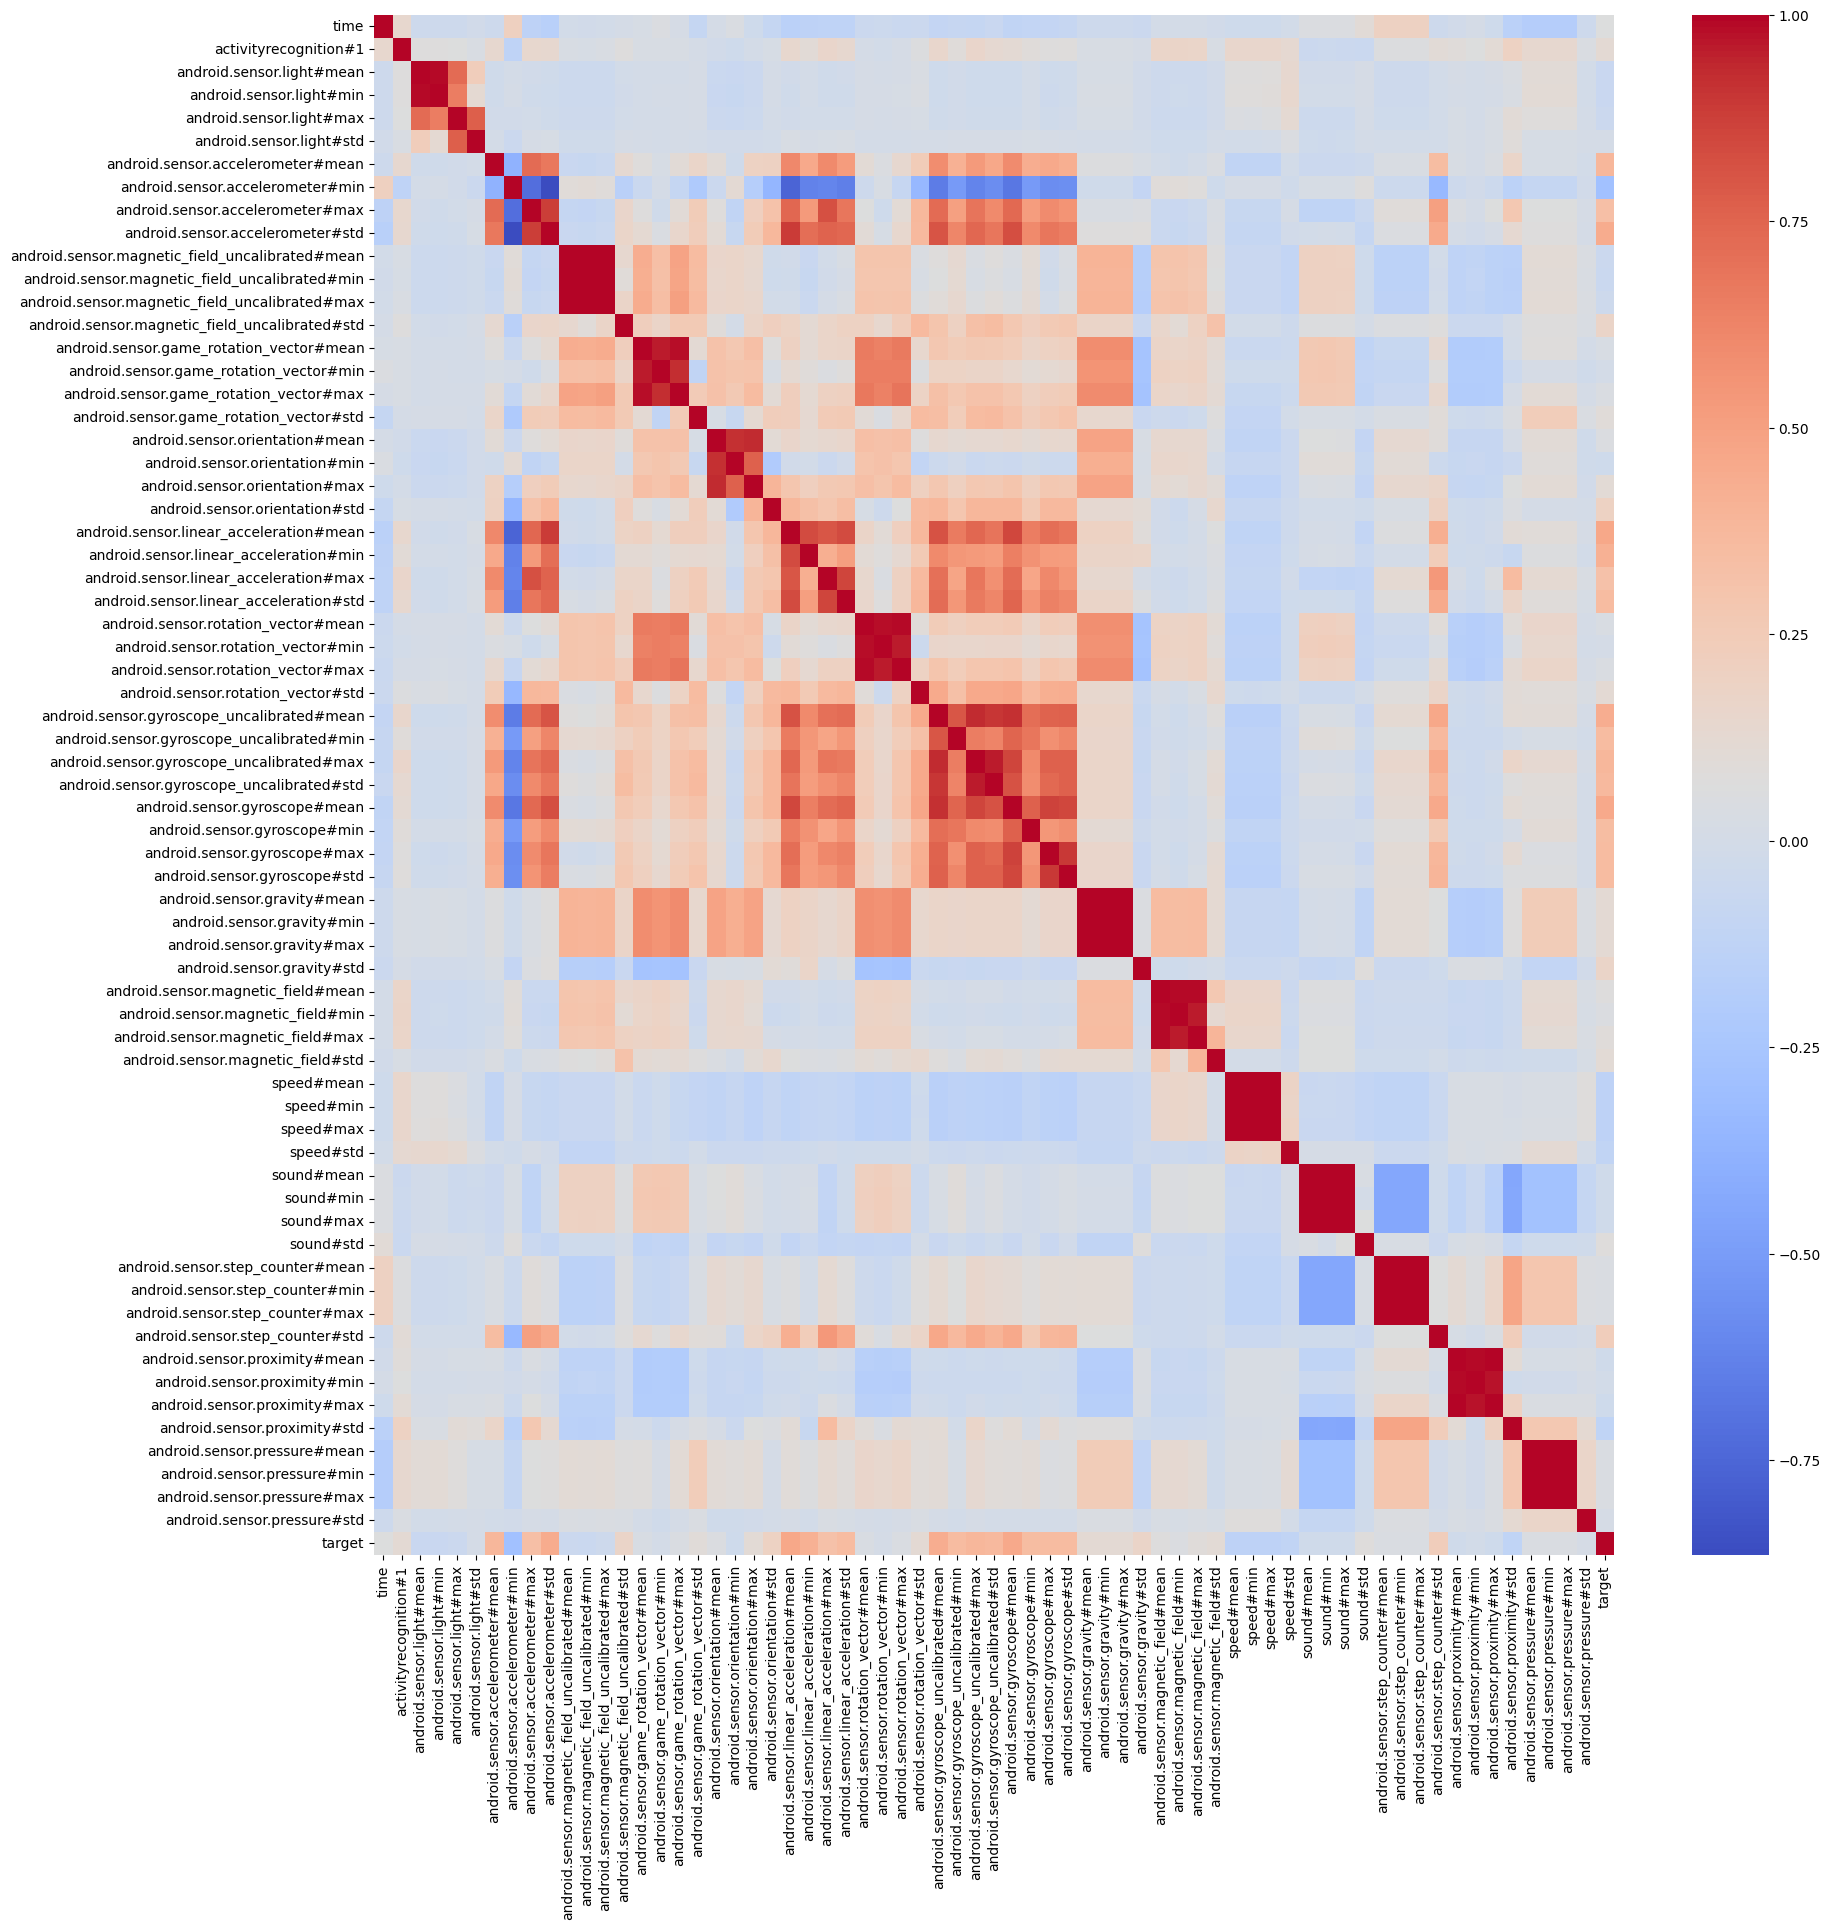

In [26]:
corr = df.corr()

plt.figure(figsize=(20,20))  
sns.heatmap(corr, annot = False, cmap = 'coolwarm')

In [27]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [28]:
corr_features = correlation(df, 0.7)
len(set(corr_features))

39

In [29]:
corr_features

{'android.sensor.accelerometer#max',
 'android.sensor.accelerometer#std',
 'android.sensor.game_rotation_vector#max',
 'android.sensor.game_rotation_vector#min',
 'android.sensor.gravity#max',
 'android.sensor.gravity#min',
 'android.sensor.gyroscope#max',
 'android.sensor.gyroscope#mean',
 'android.sensor.gyroscope#min',
 'android.sensor.gyroscope#std',
 'android.sensor.gyroscope_uncalibrated#max',
 'android.sensor.gyroscope_uncalibrated#mean',
 'android.sensor.gyroscope_uncalibrated#min',
 'android.sensor.gyroscope_uncalibrated#std',
 'android.sensor.light#max',
 'android.sensor.light#min',
 'android.sensor.light#std',
 'android.sensor.linear_acceleration#max',
 'android.sensor.linear_acceleration#mean',
 'android.sensor.linear_acceleration#min',
 'android.sensor.linear_acceleration#std',
 'android.sensor.magnetic_field#max',
 'android.sensor.magnetic_field#min',
 'android.sensor.magnetic_field_uncalibrated#max',
 'android.sensor.magnetic_field_uncalibrated#min',
 'android.sensor.ori

In [30]:
df1 = df.drop(corr_features,axis=1)

In [31]:
df1

,time,activityrecognition#1,android.sensor.light#mean,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.magnetic_field_uncalibrated#mean,android.sensor.magnetic_field_uncalibrated#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#std,android.sensor.orientation#mean,...,speed#std,sound#mean,sound#std,android.sensor.step_counter#mean,android.sensor.step_counter#std,android.sensor.proximity#mean,android.sensor.proximity#std,android.sensor.pressure#mean,android.sensor.pressure#std,target
0,1,0.0,7.0,9.673811,9.461881,134.388497,2.402502,0.796898,0.008889,152.801034,...,0.0,83.926840,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2,0.0,7.0,9.641004,5.644632,136.554708,4.736036,0.851177,0.071430,234.657601,...,0.0,83.926840,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3,0.0,7.0,9.683349,9.587583,146.481960,0.777425,0.852447,0.003714,371.520256,...,0.0,83.926840,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
3,4,0.0,7.0,9.683914,9.576666,145.652413,0.493911,0.852294,0.001668,374.477690,...,0.0,83.926840,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
4,5,0.0,7.0,9.651339,8.123766,148.306727,0.493911,0.867520,0.010512,208.772003,...,0.0,83.926840,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,24,0.0,2.0,13.521514,4.013592,0.000000,0.000000,0.000000,0.000000,360.524341,...,0.0,0.000000,0.000000,0.0,0.0,3.0,0.0,0.0,0.0,4
3246,20,0.0,58.0,10.922403,6.861404,0.000000,0.000000,0.000000,0.000000,252.167440,...,0.0,77.150268,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,4
3247,20,0.0,2.0,10.827435,4.344246,0.000000,0.000000,0.000000,0.000000,300.731729,...,0.0,0.000000,0.000000,0.0,0.0,3.0,0.0,0.0,0.0,4
3248,46,0.0,58.0,11.451001,5.781501,0.000000,0.000000,0.000000,0.000000,244.120578,...,0.0,78.495920,2.125701,0.0,0.0,0.0,0.0,0.0,0.0,4


<Axes: >

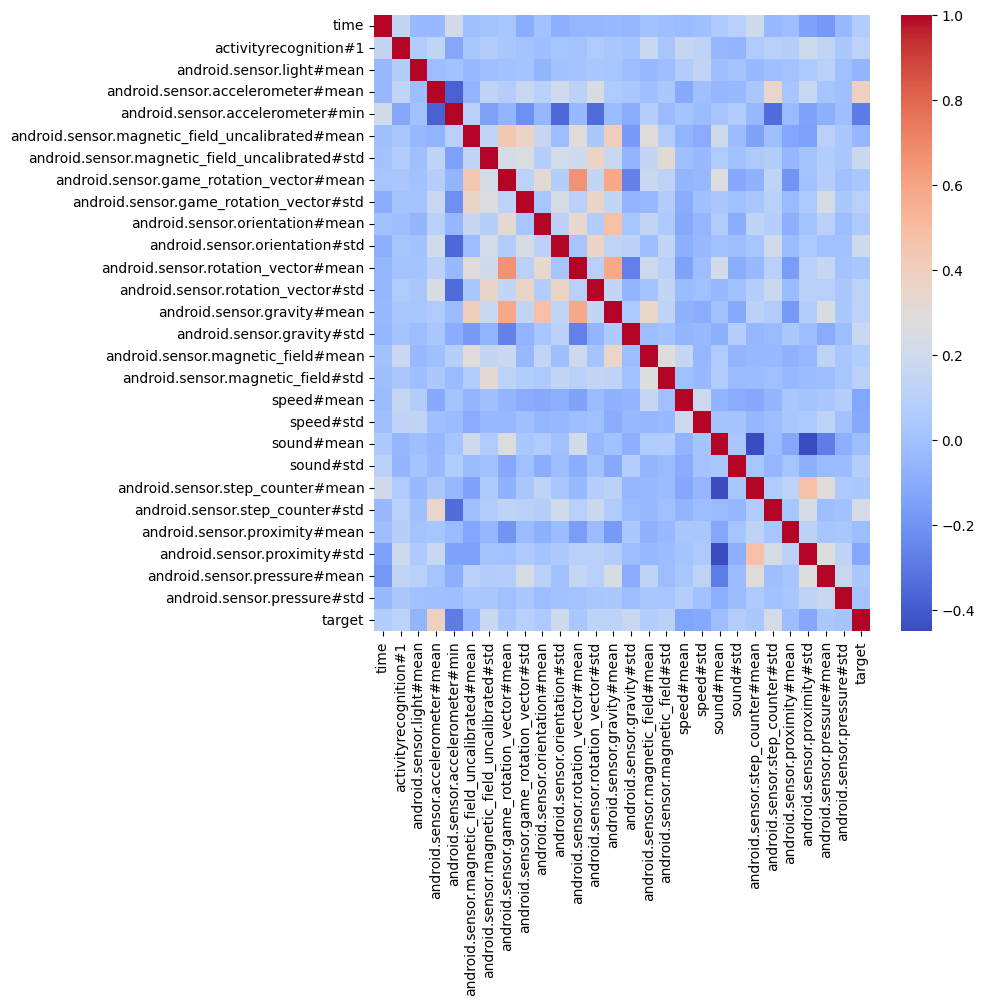

In [32]:
corr = df1.corr()

plt.figure(figsize=(8,8))  
sns.heatmap(corr, annot = False, cmap = 'coolwarm')

In [33]:
# # Distribution graphs (histogram/bar graph) of column data
# def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
#     nunique = df.nunique()
#     df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
#     nRow, nCol = df.shape
#     columnNames = list(df)
#     nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
#     plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
#     for i in range(min(nCol, nGraphShown)):
#         plt.subplot(nGraphRow, nGraphPerRow, i + 1)
#         columnDf = df.iloc[:, i]
#         if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
#             valueCounts = columnDf.value_counts()
#             valueCounts.plot.bar()
#         else:
#             columnDf.hist()
#         plt.ylabel('counts')
#         plt.xticks(rotation = 90)
#         plt.title(f'{columnNames[i]} (column {i})')
#     plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
#     plt.show()

In [34]:
# plotPerColumnDistribution(df1, 10, 5)


In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250 entries, 0 to 3249
Data columns (total 28 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   time                                             3250 non-null   int64  
 1   activityrecognition#1                            3250 non-null   float64
 2   android.sensor.light#mean                        3250 non-null   float64
 3   android.sensor.accelerometer#mean                3250 non-null   float64
 4   android.sensor.accelerometer#min                 3250 non-null   float64
 5   android.sensor.magnetic_field_uncalibrated#mean  3250 non-null   float64
 6   android.sensor.magnetic_field_uncalibrated#std   3250 non-null   float64
 7   android.sensor.game_rotation_vector#mean         3250 non-null   float64
 8   android.sensor.game_rotation_vector#std          3250 non-null   float64
 9   android.sensor.orientation#mea

In [36]:

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(enc.fit_transform(df1[['target']]).toarray())

final_df = df1.join(enc_df)


In [37]:
final_df = final_df.drop(['target'], axis = 1)

In [38]:
final_df
# Numero de colunas 
inputNumber = len(final_df.columns)

In [39]:
X = final_df.iloc[:,0:inputNumber-5] 
y = final_df.iloc[:,inputNumber-5:inputNumber]

In [40]:
X

,time,activityrecognition#1,android.sensor.light#mean,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.magnetic_field_uncalibrated#mean,android.sensor.magnetic_field_uncalibrated#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#std,android.sensor.orientation#mean,...,speed#mean,speed#std,sound#mean,sound#std,android.sensor.step_counter#mean,android.sensor.step_counter#std,android.sensor.proximity#mean,android.sensor.proximity#std,android.sensor.pressure#mean,android.sensor.pressure#std
0,1,0.0,7.0,9.673811,9.461881,134.388497,2.402502,0.796898,0.008889,152.801034,...,0.0,0.0,83.926840,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,7.0,9.641004,5.644632,136.554708,4.736036,0.851177,0.071430,234.657601,...,0.0,0.0,83.926840,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,7.0,9.683349,9.587583,146.481960,0.777425,0.852447,0.003714,371.520256,...,0.0,0.0,83.926840,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,7.0,9.683914,9.576666,145.652413,0.493911,0.852294,0.001668,374.477690,...,0.0,0.0,83.926840,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,7.0,9.651339,8.123766,148.306727,0.493911,0.867520,0.010512,208.772003,...,0.0,0.0,83.926840,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,24,0.0,2.0,13.521514,4.013592,0.000000,0.000000,0.000000,0.000000,360.524341,...,0.0,0.0,0.000000,0.000000,0.0,0.0,3.0,0.0,0.0,0.0
3246,20,0.0,58.0,10.922403,6.861404,0.000000,0.000000,0.000000,0.000000,252.167440,...,0.0,0.0,77.150268,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3247,20,0.0,2.0,10.827435,4.344246,0.000000,0.000000,0.000000,0.000000,300.731729,...,0.0,0.0,0.000000,0.000000,0.0,0.0,3.0,0.0,0.0,0.0
3248,46,0.0,58.0,11.451001,5.781501,0.000000,0.000000,0.000000,0.000000,244.120578,...,0.0,0.0,78.495920,2.125701,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
y

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
3245,0.0,0.0,0.0,0.0,1.0
3246,0.0,0.0,0.0,0.0,1.0
3247,0.0,0.0,0.0,0.0,1.0
3248,0.0,0.0,0.0,0.0,1.0


In [42]:

from sklearn.preprocessing import MinMaxScaler   #min max scaling

scaler = MinMaxScaler(feature_range=(0,1))

scaler.fit(X)

X_scaled = scaler.transform(X)


In [43]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (2080, 27) (2080, 5)
Validation Set -> (520, 27) (520, 5)
Test Set -> (650, 27) (650, 5)


In [44]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [45]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from keras.metrics import Precision, Recall
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

In [46]:

model = Sequential()
model.add(Dense(256, input_shape=(inputNumber-5,)))
model.add(Activation("relu"))
model.add(Dropout(0.40))
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.40))
model.add(Dense(5))
model.add(Activation("softmax"))


In [47]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               7168      
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 5)                 1

In [48]:

tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [49]:
model.compile(loss='categorical_crossentropy', optimizer='adam' , metrics=['accuracy', Precision(), Recall()])

In [50]:
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=64, epochs=100, verbose=1)

Epoch 1/100


33/33 [==============================] - 1s 11ms/step - loss: 1.5186 - accuracy: 0.3471 - precision: 1.0000 - recall: 0.0019 - val_loss: 1.3563 - val_accuracy: 0.5135 - val_precision: 1.0000 - val_recall: 0.0115
Epoch 2/100
33/33 [==============================] - 0s 3ms/step - loss: 1.2618 - accuracy: 0.5120 - precision: 0.7804 - recall: 0.1264 - val_loss: 1.0663 - val_accuracy: 0.6346 - val_precision: 0.8873 - val_recall: 0.2423
Epoch 3/100
33/33 [==============================] - 0s 3ms/step - loss: 1.0713 - accuracy: 0.5769 - precision: 0.7773 - recall: 0.3288 - val_loss: 0.8892 - val_accuracy: 0.6577 - val_precision: 0.8308 - val_recall: 0.4154
Epoch 4/100
33/33 [==============================] - 0s 3ms/step - loss: 0.9303 - accuracy: 0.6293 - precision: 0.8062 - recall: 0.4399 - val_loss: 0.7598 - val_accuracy: 0.7654 - val_precision: 0.9065 - val_recall: 0.5596
Epoch 5/100
33/33 [==============================] - 0s 3ms/step - loss: 0.8450 - accuracy: 0.6837 - prec

In [51]:
from sklearn.metrics import classification_report

In [52]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Loss  : {:.4f}'.format(loss))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.9508
Loss  : 0.2156
Precision : 0.9533
Recall    : 0.9415
F1 Score  : 0.9474


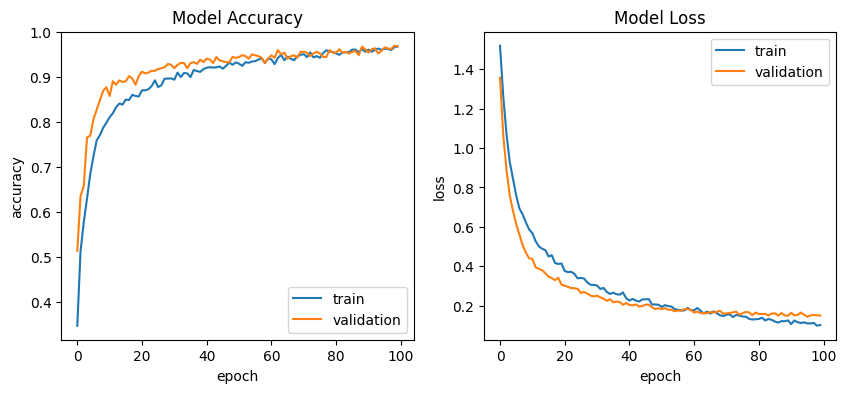

In [53]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

21/21 [==============================] - 0s 1ms/step


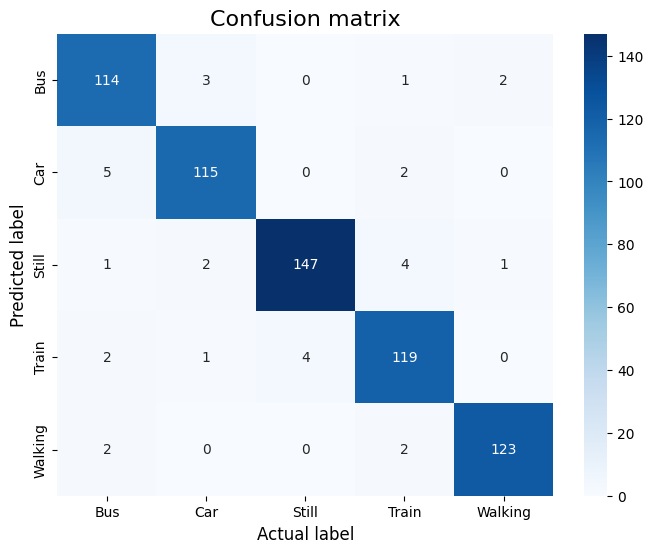

In [54]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Bus', 'Car', 'Still', 'Train', 'Walking']    #{'Bus':0,'Car':1,'Still':2,'Train':3,'Walking':4}
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)